<a href="https://colab.research.google.com/github/StuartRClark/ReservoirFun/blob/master/M2.%20Seismic%20Waves/M2_Lecture_Notes_Lecture_2_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
#@title About this course

#Course Materials Developed by Stuart Clark and Artur Shapoval, UNSW Sydney
#(c) 2021
# Updated 2023 by S. Clark

#@markdown Please run this cell before proceeding with the tutorial to ensure that all the elements are loaded correctly
%%capture
from IPython.display import HTML, YouTubeVideo
!git clone https://github.com/Artshap/PTRL5014_2019.git
!cp -r PTRL5014_2019/NMO_Tutorial/files/ data/
!rm -rf PTRL5014_2019 sample_data
!pip install SimPEG
from data.NMOwidget import *

synData = 'data/syndata1.npy' #loading numpy array with data
obsData = 'data/obsdata1.npy'
timeData = 'data/time1.npy'

## About this module

At the end of this module, you should be able to:

* Describe the acquisition of reflection seismic data in 2D
* Plot 2D seismic data using python
* Explain what acoustic impedence is
* Explain how the reflection coefficient is measured
* Understand wavelets
* Describe gathers and NMO


## About this lecture

In this lecture we will discuss:

* How to plot 2D seismic data
* How gathers work
* What normal moveout is


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#Acquisition of Reflection Seismic Data in 2D

Last week, we looked at 1D seismic data and acquisition where the source and receiver were in the same location. For most purposes, this is not the case, with the source (airguns) and receivers moving (hydrophones in streamers) moving together in the case of marine acquisition OR the source moving (vibrotruck) and the receivers being buried in the ground and static (geophones) and then the whole set of geophones picked up and moved to a new location in the case of land acquisition.

To take advantage of the multiple receiver locations, we can boost our *signal-to-noise ratio* - that is our signal can stand out from the noise - by taking advantage of something called a gather.

## What is a gather?

A gather is a way of collecting the energy from multiple shots or receivers. In the image below, the truck moves along and send out pulses of vibrations - each of these shots we will call $S_1$, $S_2$ and $S_3$. The energy from each of these shots will bounce of separate layers and be picked up by each of the receivers, $R_1$, $R_2$ and $R_3$. If the number of layers is $L$ (note the number of interfaces is $L-1$), each receiver will receive 3\*(L-1) reflected waves. If we design the acquisition right, we will be able to assemble the waves bouncing off a particular point of the first interface by gathering the seismic signal from $R_1$, $R_2$ and $R_3$ that bounces off the *Common Depth Point (CDP)* for that layer as shown below.

We have a common depth point for each layer. The expression of this point at the surface is called a Common Mid-Point and a gather for all these common depth points at this point is called a *Common MidPoint Gather (CMP)* all the data lie below this point. See: http://www.subsurfwiki.org/wiki/Gather for details on the different types of gathers.


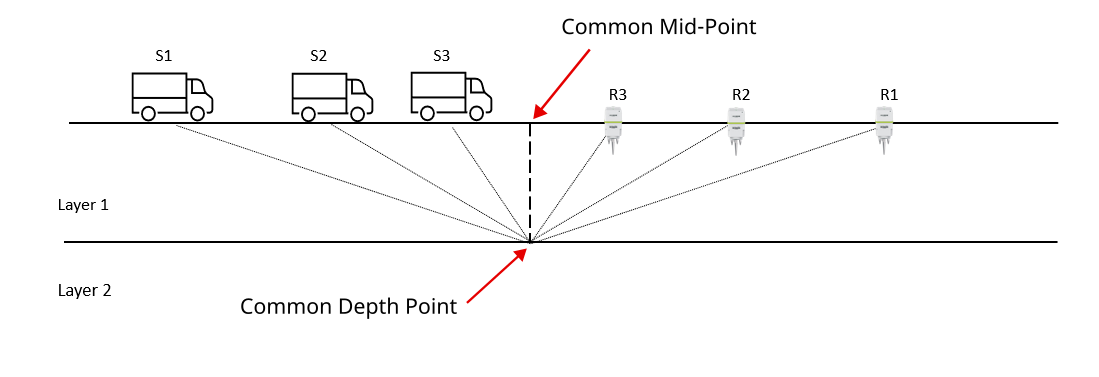

There in only one problems with this: The ray-path from S1 to R1 is *longer* than the path from S2 to R2 and S3 to R3, so we need to correct for the delay in time using **Normal Moveout Correction**

Before we look at that, let's remind ourselves how to plot 2D seismic data as could be expected from the seismic acquisition above.

## How to plot 2D seismic data

Imagine we have 3 seismic receivers listening at an interval of 0.1 s. We record the amplitude of any deflections (positive or negative) at each of these time intervals, up to 1.0 s.

We could create an array to represent these instances of time (common to all 3 receivers) by the following code:


In [18]:
times = np.arange(0.1,1.1,0.1)
print(times)

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


```arange(0.1,1.1,0.1)``` means to start at 0.1 stop **before** 1.1 and increment every 0.1.

As mentioned, each of the 3 seismic receiver generates a **trace** of amplitues for each of these 9 time points, represented by the 3 columns below:



In [19]:
traces =  np.array([[-1.39003414,  0.69501707,  0.27800683],
                    [ 3.85366153,  1.17316923,  1.82926769],
                    [-1.46640422,  0.73320211,  0.29328084],
                    [ 4.49305454,  1.45347273,  2.28138909],
                    [-0.51794406, -0.43102797, -0.46841119],
                    [ 0.55871931, -0.27935966, -0.11174386],
                    [-0.97046072, -3.06476964, -2.76590786],
                    [ 0.71208994,  0.50395503,  0.63158201],
                    [-1.01599749,  0.50799875,  0.2031995 ],
                    [ 1.53860614,  3.98069693,  3.21227877]])

## 2D Density Plot
We can plot this data using a grayscale 2D plot, where each cell or pixel in the plot is coloured by the amplitude (higher amplitudes black, negative white and amplitudes around 0 are grey)

We can see 4 layers somewhat here:

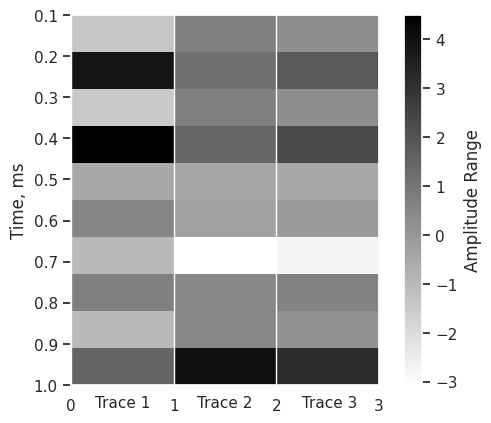

In [20]:
# Create the plot items
fig, graph = plt.subplots()
# Create a 2D image from the traces
image = graph.imshow(traces, cmap = 'gray_r', extent = [0,3,times[-1],times[0]])
# Create a colour bar of the amplitude ranges
fig.colorbar(image, label = 'Amplitude Range')

# X axes magic
graph.set_xticks(np.linspace(0,3,4))
graph.set_xticks([0.5,1.5,2.5],      minor=True)
graph.set_xticklabels(['Trace 1','Trace 2',' Trace 3'], minor=True)

graph.grid(axis = 'y')
graph.set_ylabel('Time, ms')
graph.set_aspect(4)
graph.tick_params(left='off')

plt.show()


The plot doesn't show the horizons clearly because the noise dominates each individual trace. However, by stacking them together we can clearly identify every horizon, as seen below. Note the change in the amplitude range - for which the amplitudes (both positive and negative) have doubled.

We can plot that data using the code below:

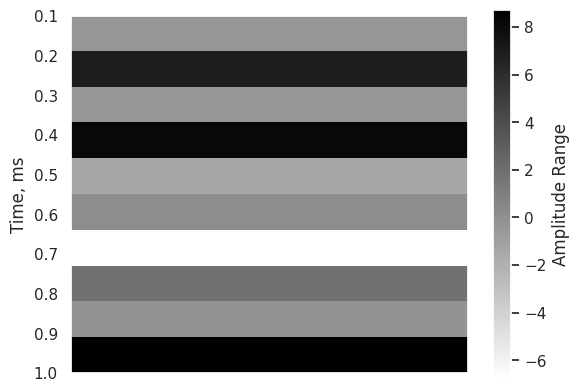

In [21]:
stack = traces[:,0] + traces[:,1] + traces[:,2] # [:,i] allows us to slice through the array vertically, where i is a number of column of data
stack_resh = stack.reshape(10,1) #transposing the array to plot it vertically
plt.imshow(stack_resh, cmap = 'gray_r', extent = [0,1,times[-1],times[0]])
plt.grid()
plt.xticks([])
plt.ylabel('Time, ms')
plt.colorbar(label = 'Amplitude Range') #uncomment this to vizualise the colorbar
plt.show()

## Why do we need gathers?

Gathers are very helpful in decreasing the noise to signal ratio in the seismic data. Since noise is random, when added together it will mostly cancel out, but since the signal is not, it will become stronger when added. You can see the effect below of the signal increasing in amplitude in the image below.

Our three traces are shown below. Since the wave to $R_1$ has to travel longer, the signal on trace $1$ is delayed compared to that of $R_3$. Therefore we have to correct for this time delay before we can stack the traces. This correction is called Normal MoveOut (NMO), as we will see below. Assume we can calculate the $\Delta{T}$, we can correctly align the signals and gather or stack the traces as below.

In addition, noise from 1, 2 and 3 (not shown below) will *not* stack and therefore will cancel out (with enough gathers).

Seismic Velocities

#Acoustic Impedance and Reflectivity
Each layer has an acoustic impedance - a measure of how the system impedes the wave. Acoustic impedance ($A.I.$) is calculated by:

$A.I. = \rho v$, where $\rho$ is the density of the layer and $v$ is the velocity of the wave in the layer.

While acoustic impedance is a property of the layer, it is changes in acoustic impedance that give rise to reflections.

The reflection coefficient, $R$, (or the fraction of the amplitude of the wave reflected back when encountering an interface) is given by the change in A.I.:

$R = \frac{\rho_{2}v_{2} - \rho_{1}v_{1}}{\rho_{2}v_{2} + \rho_{1}v_{1}}$

(assuming pressure wave). The transmission coefficient, $T$, (the fraction of the amplitude transmitted across the interface) is given as:

$T = 1+R$, which is the sum of the reflected wave and the incident wave. This is because the sum of the amplitude on the two sides of the interface needs to be the same, so on one side we have the incoming and reflected wave and on the other, only the transmitted wave. Using this formula, we can calculated $T$ directly via:

$T = \frac{2\rho_{2}v_{2}}{\rho_{2}v_{2} + \rho_{1}v_{1}}$

Below is an example of how to calculate the reflection coefficients from each of three interfaces, $R_1, R_2, R_3$ based on the velocity and density properties of each of the four layers.

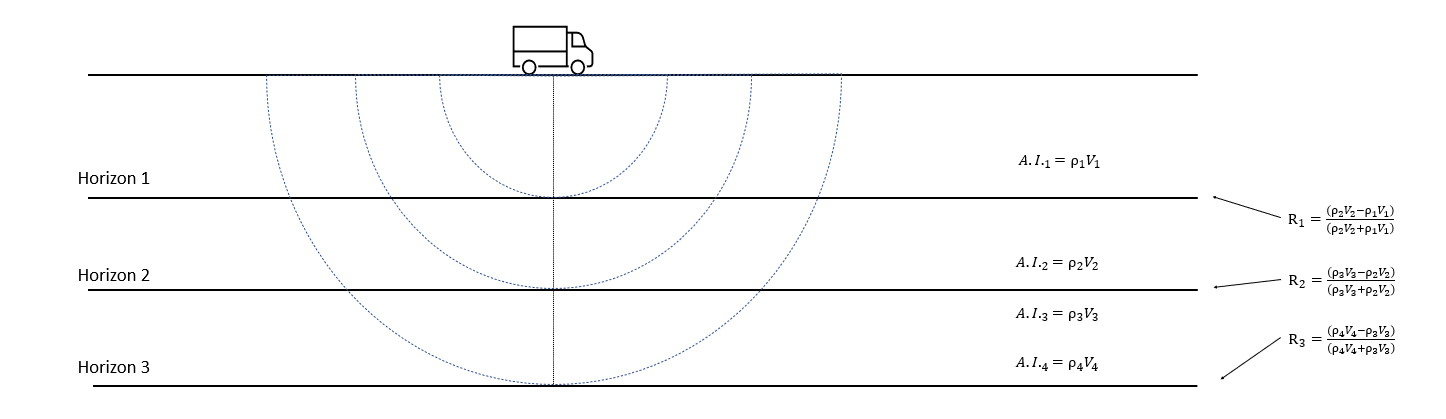

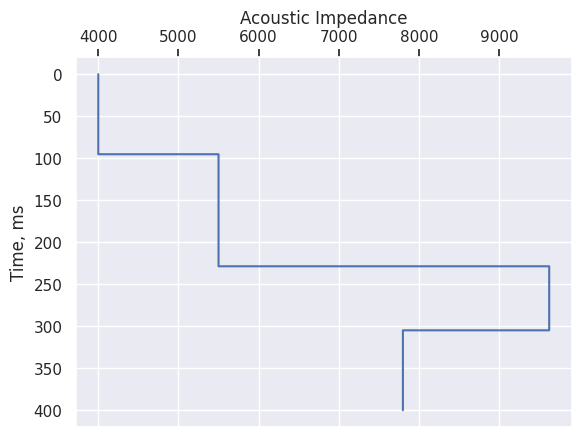

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

max = 400
npoints = 2100

times = np.linspace(start = 0, stop = max, num = npoints)

# Set up the Density and Velocity Arrays
densities = np.zeros(npoints)
velocities = np.zeros(npoints)

# Layer 1
densities[0:500] = 2.0 #kgm^-3
velocities[0:500] = 2000
#Layer 2
densities[500:1200] = 2.5
velocities[500:1200] = 2200
#Layer 3
densities[1200:1600] = 2.75
velocities[1200:1600] = 3500
#Layer 4
densities[1600:2100] = 3.00
velocities[1600:2100] = 2600

#let's calculate Acoustic Impedance based on these values:
ai = densities * velocities

#with calculation done, let's plot our acoustic impedance versus time

fig, ax = plt.subplots() #creating a figure so we can assign settings to it, such as axis position
ax.step(ai, times,where='pre') #actually plotting the data using a *step* function to preserve the layers
ax.invert_yaxis()  #we plot from top to bottom
ax.set_ylabel('Time, ms')
ax.set_xlabel('Acoustic Impedance')
ax.xaxis.set_label_position('top')#showing x axis at the top instead of the bottom
ax.xaxis.tick_top()#showing x axis at the top instead of the bottom

Assume we have the following NMO corrected data (we will look at *how* to get the traces to stack with NMO at the end), with the $i$th column representing $R_i$:


0.16
0.27
-0.10


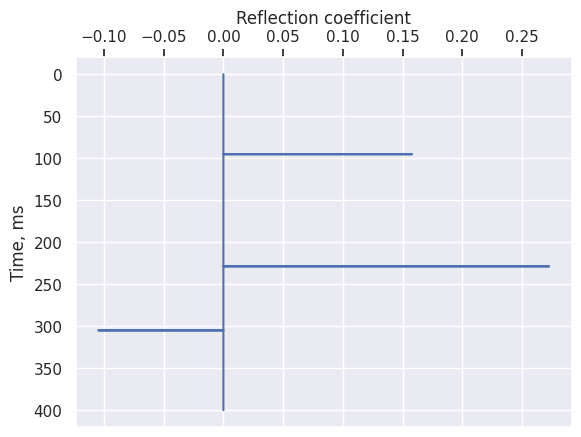

In [23]:
#now we can calculate the reflection coefficient.
R = [] #first we create an empty array which we will fill with calculated values

"""
We will be iterating through the data.
The last point will be excluded as calculation requires a point and the next one after that.
If not excluded, we will receive an error in the last iteration
"""

for index in range(len(times)-1):
    numerator = ai[index+1] - ai[index]
    denominator = ai[index+1] + ai[index]
    result = numerator / denominator
    R.append(result)
    if result != 0:
      print ("%.2f" % result)

#let's plot the reflection coefficient vs time too

fig, ax = plt.subplots() #creating a figure so we can assign settings to it, such as axis position
ax.step(R, times[:-1], where="pre") # create a step plot
ax.invert_yaxis()  #we plot from top to bottom
ax.set_ylabel('Time, ms')
ax.set_xlabel('Reflection coefficient')
ax.xaxis.set_label_position('top') #showing x axis at the top instead of the bottom
ax.xaxis.tick_top() #showing x axis at the top instead of the bottom

We can see three distinct non-zero reflection coefficients, 0.16, 0.27 and -0.1 representing each of the three layers.

**What would the transmission coefficients be? **

The final step is generating a seismic trace from these reflection coefficients. Usually packets of seismic energy generated from airguns or vibrotrucks form wavelets



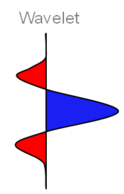

These wavelets interact with the reflection coefficients to give a seismic trace. Mathematically, this process is through **convolution**.


We can create the wavelet above (called a Ricker wavelet) using python.

The width of the wavelet will determine how precisely we can 'see' the interface (or how blurred it becomes).

**Does wider = better or worse 'vision'?**



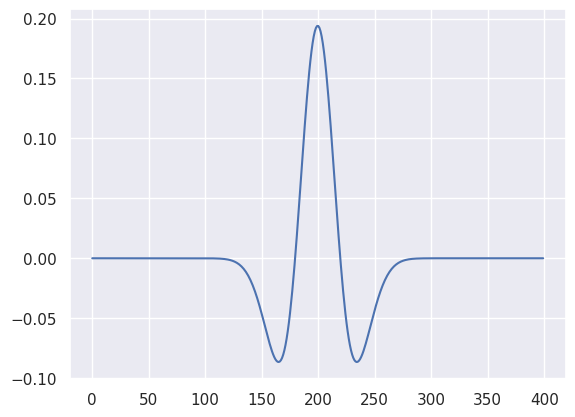

In [24]:
from scipy import signal

points = 400
wavelet_width = 20
wavelet_ricker = signal.ricker(points, wavelet_width)
plt.plot(wavelet_ricker)
plt.show()


Now we will convolve this wavelet to create the seismic trace as in the image below:

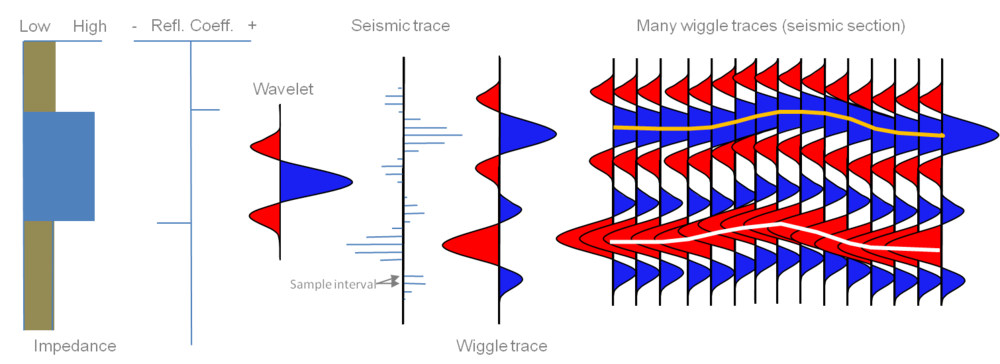

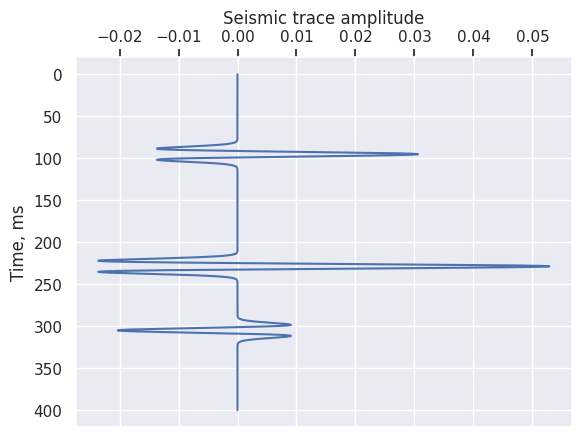

In [25]:
seismic_trace = np.convolve(R, wavelet_ricker, 'same') #calculating the seismic trace

fig, ax = plt.subplots() #creating a figure so we can assign settings to it, such as axis position

ax.plot(seismic_trace, times[:-1]) #actually plotting the data
ax.invert_yaxis()  #we plot from top to bottom
ax.set_ylabel('Time, ms')
ax.set_xlabel('Seismic trace amplitude')
ax.xaxis.set_label_position('top')#showing x axis at the top instead of the bottom
ax.xaxis.tick_top()#showing x axis at the top instead of the bottom

# 3. Normal Moveout Correction

## What is Normal Moveout?

![alt text](https://github.com/Artshap/PTRL5014_2019/blob/master/NMO_Tutorial/figures/acquisition.png?raw=true
)

The waves from the seismic source ($S$) to the receivers ($R_1$, $R_2$, ...) are as follows:

1.   Direct wave - a straight line through the water between source and receiver
2.   Multiple from the sea bottom off the underside of the sea surface and back to the receiver
3. Reflection from the sea bottom
4. Reflection from the base of the first subsurface layer

Since the direct arrival travels straight to the receiver, the time to get to the receiver $R_i$ is directly proportional to the distance between $S$ and the receiver. However, for wave 3, the wave travels along the two other sides of a triangle formed by waves 1&3 and hence obeys the formula below.



Each reflection event in a CMP gather has a travel time that corresponds to a hyperbola:

$$ t(x) = \sqrt{\frac{x^2}{v^2_{NMO}} + t_0^2}$$

where $x$ is offset between source and receiver, $v_{NMO}$ is the NMO velocity, and $t_0$ is the two-way time to the horizon at depth $d$:

$$ t_0 = \sqrt{\frac{4d^2}{v^2_{NMO}}}$$

where $d$ is the depth to the horizon layer.

- For each reflection event hyperbola, perform a velocity analysis to find $v_{NMO}$. This is done by first choosing $t_o$. Then adjusting the value of velocity. <img src="http://www.eos.ubc.ca/courses/eosc350/content/methods/meth_10d/assets/kearey_fig4_21.gif"></img>

- Calculate the Normal Moveout Correction: Using the hyperbolia corresponding to $v_{NMO}$, compute the normal moveout for each trace and then adjust the reflection time by the amount $\triangle T$: $$ \triangle T = t(x) - t_0 \\ $$

## Finally Stack the Traces

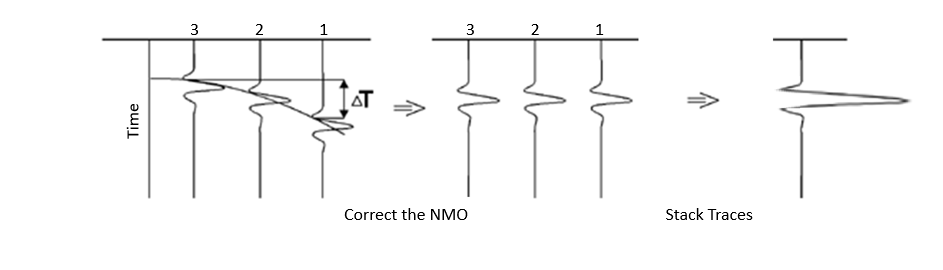

> Source: reproduced from https://gpg.geosci.xyz/content/seismic/seismic_reflection_stacking.html




In [26]:
#@markdown NMO Example
HTML('<iframe width="640" height="360" src="https://web.microsoftstream.com/embed/video/cdb357c1-0bda-478b-a301-a05f5c73c7b0?autoplay=false&amp;showinfo=true" allowfullscreen style="border:none;"></iframe>')

## Interactive NMO Correction exercise

Parameters of the below widget to fit observed reflection event are:

- t0: intercept time of the hyperbola
- v: velocity of the hyperbola

You can see how the wavelet affects the very sharp reflection coeefficient values.


**What if the layers become too small with respect to the width of the wavelet? **

In [27]:
#@markdown Interactive NMO Correction for the Clean CMP
clean = InteractClean(synData,timeData)
clean

interactive(children=(FloatSlider(value=0.2, continuous_update=False, description='t0', max=0.8, min=0.2, step…

In [28]:
#@markdown Interactive NMO Correction for the Noisy CMP

noisy = InteractNosiy(obsData,timeData)
noisy

interactive(children=(FloatSlider(value=0.1, continuous_update=False, description='t0', max=0.6, min=0.1, step…

## NMO Correction in professional seismic interpretation software:

Below is the example of how the NMO correction is applied using the proffessional software, in this case, DUG Insight:



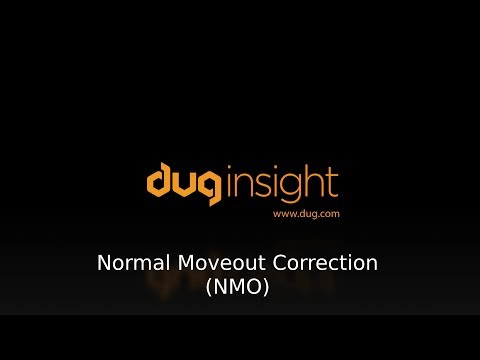

In [29]:
YouTubeVideo('7P3-3NzbYJA')